In [1]:
import csv
import numpy as np
import pandas as pd
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = read_csv("steam_gamesClean.csv", dtype=str, delimiter=';', on_bad_lines='skip')
data.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,"Header Image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,0,000 .. 20,0,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","Shoot Em Up: 186, Metroidvania: 181, Bullet He...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [3]:
data = data.drop(labels = ["Type", "Initial Price", "Discount", "CCU", "Platforms", "Website", "Header Image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,", "Release Date", "Required Age"], axis=1)
print(data.shape)

(51122, 13)


In [4]:
owners = data["Owners"].str.replace(",0,",",000,")
owners.value_counts().tail()
topgames = data[
    (owners == '200,000,000 .. 500,000,000') | 
    (owners == '50,000,000 .. 100,000,000')]
topgames

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Categories,Owners,Positive Reviews,Negative Reviews,Price,Languages
2049,1063730,New World,"Explore a thrilling, open-world MMO filled wit...",Amazon Games,Amazon Games,"Action, Adventure, Massively Multiplayer, RPG","Massively Multiplayer: 595, Open World: 571, M...","Multi-player, Co-op, MMO, Steam Achievements, ...","50,0,000 .. 100,0,000",163825,74340,1999,"English, French, Italian, German, Spanish - Sp..."
32462,440,Team Fortress 2,Nine distinct classes provide a broad range of...,Valve,Valve,"Action, Free to Play","Free to Play: 61692, Hero Shooter: 60611, Mult...","Multi-player, Valve Anti-Cheat enabled, Captio...","50,0,000 .. 100,0,000",846407,57423,0,"English, Danish, Dutch, Finnish, French, Germa..."
36667,570,Dota 2,"Every day, millions of players worldwide enter...",Valve,Valve,"Action, Free to Play, Strategy","Free to Play: 58679, MOBA: 19557, Multiplayer:...","Multi-player, Valve Anti-Cheat enabled, Co-op,...","200,0,000 .. 500,0,000",1534895,317916,0,"English, Bulgarian, Czech, Danish, Dutch, Finn..."
36979,578080,PUBG: BATTLEGROUNDS,Play PUBG: BATTLEGROUNDS for free. Land on str...,"KRAFTON, Inc.","KRAFTON, Inc.","Action, Adventure, Free to Play, Massively Mul...","Survival: 14152, Shooter: 11956, Multiplayer: ...","Multi-player, Stats, Online PvP, Remote Play o...","50,0,000 .. 100,0,000",1185361,908515,0,"English, Korean, Simplified Chinese, French, G..."
42104,730,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,"Valve, Hidden Path Entertainment",Valve,"Action, Free to Play","FPS: 88154, Shooter: 63364, Multiplayer: 60476...","Multi-player, Valve Anti-Cheat enabled, Stats,...","50,0,000 .. 100,0,000",5943345,787093,0,"English, Czech, Danish, Dutch, Finnish, French..."


In [5]:
data = data.drop(data[pd.to_numeric(data['Positive Reviews']) <= 20].index).reset_index(drop=True)
data = data.drop(data[pd.to_numeric(data['Negative Reviews']) <= 20].index).reset_index(drop=True)
data.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Categories,Owners,Positive Reviews,Negative Reviews,Price,Languages
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...","Multi-player, Valve Anti-Cheat enabled, Online...","10,0,000 .. 20,0,000",201215,5199,999,"English, French, German, Italian, Spanish - Sp..."
1,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...","Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",4032,646,599,"Simplified Chinese, English, Japanese, Traditi..."
2,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...","Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",1575,115,1999,English
3,1000080,Zengeon,Zengeon is an anime infused Action RPG and Rog...,IndieLeague Studio,2P Games,"Action, Adventure, Indie, RPG","Action: 138, Indie: 128, RPG: 121, Adventure: ...","Multi-player, Single-player, Steam Achievement...","100,000 .. 200,000",1018,462,799,"Simplified Chinese, English, Traditional Chine..."
4,1000110,Jumping Master(跳跳大咖),Jumping Master is a innovative casual competit...,重庆环游者网络科技,重庆环游者网络科技,"Action, Adventure, Casual, Free to Play, Massi...","Free to Play: 26, Massively Multiplayer: 25, A...","Multi-player, Single-player, Co-op, Online PvP...","20,000 .. 50,000",50,34,0,"English, Simplified Chinese, Traditional Chinese"


In [6]:
data["Rating Difference"] = pd.to_numeric(data["Positive Reviews"]) - pd.to_numeric(data["Negative Reviews"])
data["Rating Difference"]

0        196016.0
1          3386.0
2          1460.0
3           556.0
4            16.0
           ...   
14983        18.0
14984       121.0
14985      1938.0
14986       233.0
14987       723.0
Name: Rating Difference, Length: 14988, dtype: float64

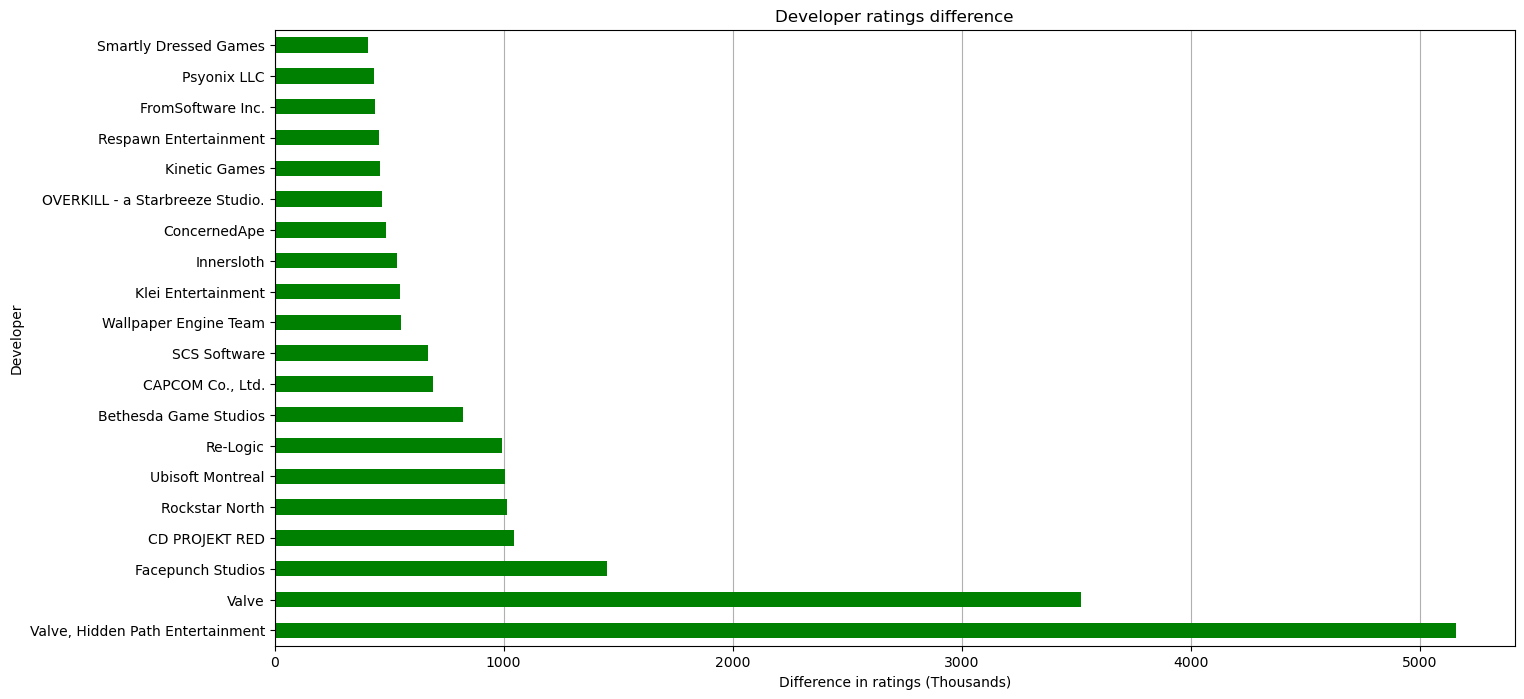

In [7]:
dev_ratios = data.groupby("Developer")["Rating Difference"].sum()
heads = dev_ratios.sort_values(ascending=False).head(20)/1000
fig2, ax2 = plt.subplots(figsize=(16,8))

heads.plot(kind='barh', color='green', ax=ax2)

plt.title('Developer ratings difference')
plt.xlabel('Difference in ratings (Thousands)')
plt.ylabel('Developer')

plt.grid(axis='x')
ax2.set_axisbelow(True)
plt.show()

In [8]:
tags = data["Tags"].replace('(: \d*,)', '', regex=True)
tags = tags.astype(str)
tags.head()

0    Action FPS Multiplayer Shooter Classic Team-Ba...
1    Rogue-like Turn-Based Combat RPG Perma Death R...
2    Typing Management Casual Difficult Arcade Stra...
3    Action Indie RPG Adventure Action Roguelike An...
4    Free to Play Massively Multiplayer Action Casu...
Name: Tags, dtype: object